<a href="https://colab.research.google.com/github/annefrancine/Deep-Learning-Models-/blob/master/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#! pip install tensorflow --upgrade

In [0]:
#!pip install Keras

# Import packages 

In [71]:
import tensorflow
print(tensorflow.__version__)

2.2.0-rc3


In [0]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


# Loading the dataset


In [0]:
dataset = keras.datasets.fashion_mnist

In [0]:
((X_train,y_train),(X_test,y_test))= dataset.load_data()

# Exploring the data

In [75]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [76]:
len(X_train)
X_train.shape

(60000, 28, 28)

In [77]:
X_test.shape

(10000, 28, 28)

In [78]:
len(y_train)
y_train.shape

(60000,)

# Displaying the data

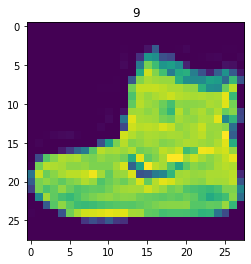

In [79]:
plt.imshow(X_train[0]);
plt.title(y_train[0]);

In [80]:
y_train.min(),y_train.max()

(0, 9)

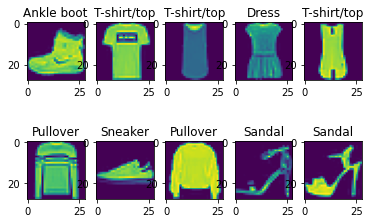

In [81]:
total_labels = 10
name_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress' , 'Coat' , 'Sandal' 
              ,'Shirt', 'Sneaker', 'Bag' , 'Ankle boot']

for X in range(10):
  plt.subplot(2, 5, X+1)
  plt.imshow(X_train[X])
  plt.title(name_labels[y_train[X]])

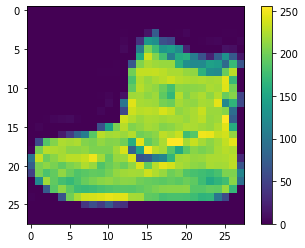

In [82]:
plt.imshow(X_train[0])
plt.colorbar();

# Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Model
Let’s define the model and train it. 



In [84]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(128, activation=tensorflow.nn.relu),
    #keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historical = model.fit(X_train, y_train, epochs=5, validation_split=0.2)



Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5242 - accuracy: 0.8145 - val_loss: 0.4401 - val_accuracy: 0.8377
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4001 - accuracy: 0.8530 - val_loss: 0.3729 - val_accuracy: 0.8662
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3636 - accuracy: 0.8661 - val_loss: 0.3510 - val_accuracy: 0.8736
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3407 - accuracy: 0.8747 - val_loss: 0.3506 - val_accuracy: 0.8743
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3240 - accuracy: 0.8808 - val_loss: 0.3299 - val_accuracy: 0.8802


In [85]:
test = model.predict(X_test)
print('test result :', np.argmax(test[1]))
print('test image number :', y_test[1])

test result : 2
test image number : 2


In [86]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print('Loss:', loss_test)
print('Accuracy:', accuracy_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8719
Loss: 0.35265302658081055
Accuracy: 0.8719000220298767


# Model summary

In [87]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# First layer weights

In [88]:
weights_layer_dense = model.layers[1].get_weights()
weights_layer_dense 

[array([[ 0.02136425,  0.0143549 , -0.02835578, ...,  0.06032179,
         -0.00829472,  0.18348919],
        [ 0.16115554,  0.02705611, -0.15056238, ..., -0.09238803,
         -0.03325472,  0.12176704],
        [ 0.1559132 ,  0.00201333, -0.16104218, ..., -0.00586037,
          0.07316362, -0.02433423],
        ...,
        [ 0.16508308, -0.06721877, -0.0287217 , ..., -0.10274371,
         -0.04173208,  0.00335375],
        [ 0.13269466, -0.08103061, -0.07361592, ..., -0.11784628,
          0.06391502, -0.06115231],
        [ 0.14714244, -0.07163489, -0.05285348, ..., -0.07344918,
         -0.07152823,  0.04710271]], dtype=float32),
 array([ 0.04202452, -0.02140526,  0.3944742 , -0.01654064, -0.00894418,
        -0.01724665, -0.1851324 ,  0.09166002,  0.23931895,  0.3522695 ,
         0.04849499,  0.35211378,  0.06542978, -0.01887763,  0.02308339,
         0.08529705,  0.0031538 , -0.00805257,  0.19996767,  0.06772914,
         0.23534061,  0.02460703,  0.20040752, -0.04353298,  0.133

In [89]:
biases_layer_dense = model.layers[1].get_weights()[1]
biases_layer_dense 

array([ 0.04202452, -0.02140526,  0.3944742 , -0.01654064, -0.00894418,
       -0.01724665, -0.1851324 ,  0.09166002,  0.23931895,  0.3522695 ,
        0.04849499,  0.35211378,  0.06542978, -0.01887763,  0.02308339,
        0.08529705,  0.0031538 , -0.00805257,  0.19996767,  0.06772914,
        0.23534061,  0.02460703,  0.20040752, -0.04353298,  0.1335763 ,
        0.21393168, -0.0244502 ,  0.17051332,  0.12948544, -0.01992019,
        0.14543842, -0.01533809,  0.12695207, -0.12399478,  0.338699  ,
       -0.1368359 ,  0.19601013,  0.30630863,  0.25657353, -0.01597604,
        0.18196009, -0.01350168,  0.02090169,  0.2209448 ,  0.0543889 ,
       -0.25082326, -0.03507591,  0.1293318 ,  0.06343088, -0.01041793,
        0.32378232, -0.14247443,  0.28228152, -0.22140713,  0.19850476,
        0.02215739, -0.01623486,  0.09830198,  0.07418302,  0.04972406,
        0.22068368,  0.15620324, -0.31577846, -0.16623269, -0.14238463,
        0.32462877,  0.06229697,  0.3273772 ,  0.13046317,  0.19

# Saving and loading the trained model

In [0]:
from tensorflow.keras.models import load_model

model.save('model.h5')
model_salvo = load_model('model.h5')

# Viewing training and validation accuracy by epoch

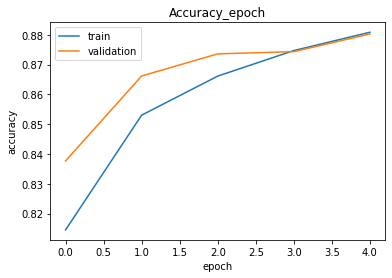

In [91]:
plt.plot(historical.history['accuracy'])
plt.plot(historical.history['val_accuracy'])
plt.title('Accuracy_epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation']);

# Viewing training losses and validation by epochs

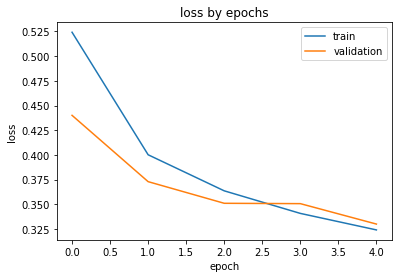

In [92]:
plt.plot(historical.history['loss'])
plt.plot(historical.history['val_loss'])
plt.title('loss by epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation']);

# Testing the model and the saved model

In [93]:
test = model.predict(X_test)
print('test result:', np.argmax(test[1]))
print('test image number:', y_test[1])


test result: 2
test image number: 2


In [0]:
test_model_save = model_salvo.predict(X_test)

In [95]:
print('test result:', np.argmax(test_model_save[1]))
print('test image number:', y_test[1])

test result: 2
test image number: 2


# Evaluating the model

In [96]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print('Loss:', loss_test)
print('Accuracy:', accuracy_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8719
Loss: 0.35265302658081055
Accuracy: 0.8719000220298767
